# Lecture 8

\begin{equation*}
a = \frac{N\sum_{i=0}^N y_ix_i - \sum_{i=1}^N x_i\sum_{i=1}^N y_i}{N\sum_{i=1}^N x_i^2 - (\sum_{i=1}^N x_i)^2}\\
a = \frac{\sum_{i=0}^N y_ix_i - \sum_{i=1}^N x_i\frac{\sum_{i=1}^N y_i}{N}}{\sum_{i=1}^N x_i^2 - \sum_{i=1}^N x_i \frac{\sum_{i=0}^N x_i}{N}}\\
x.dot(y) = \sum_{i=1}^N x_iy_i\\
x.sum() = \sum_{i=1}^N x_i\\
y.mean() = \frac{\sum_{i=1}^N y_i}{N}\\
x.dot(x) = \sum_{i=1}^N x_i^2\\
\Rightarrow a=(x.dot(y)−y.mean()∗x.sum()) / (x.dot(x)−x.mean()∗x.sum())
\end{equation*}

\begin{equation*}
b = \frac{\sum_{i=1}^N y_i\sum_{i=1}^N x_i^2 - \sum_{i=1}^N x_i\sum_{i=0}^N y_ix_i}{N\sum_{i=1}^N x_i^2 - (\sum_{i=1}^N x_i)^2}\\
b = \frac{\frac{\sum_{i=1}^N y_i}{N}\sum_{i=1}^N x_i^2 - \frac{\sum_{i=1}^N x_i}{N}\sum_{i=0}^N y_ix_i}{\sum_{i=1}^N x_i^2 - \sum_{i=1}^N x_i \frac{\sum_{i=0}^N x_i}{N}}\\
\Rightarrow b=(y.mean() * x.dot(x) - x.mean() ∗ x.dot(y)) / (x.dot(x)−x.mean()∗x.sum())
\end{equation*}

# Lecture 12

In [1]:
import re
import numpy as np
import matplotlib.pyplot as plt

In [2]:
X = []
Y = []

non_decimal = re.compile(r'[^\d]+')

for line in open('moore.csv'):
    r = line.split('\t')
    x = int(non_decimal.sub('', r[2].split('[')[0]))
    y = int(non_decimal.sub('', r[1].split('[')[0]))
    X.append(x)
    Y.append(y)

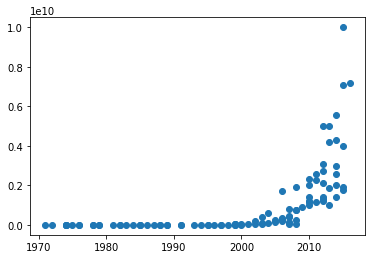

In [3]:
X = np.array(X)
Y = np.array(Y)

plt.scatter(X, Y)
plt.show()

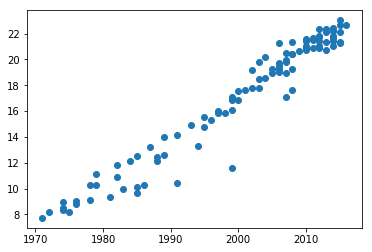

In [4]:
Y = np.log(Y)
plt.scatter(X, Y)
plt.show()

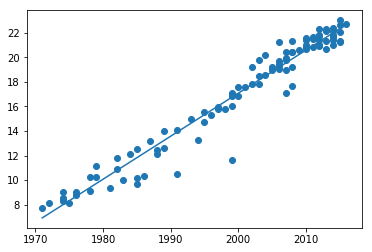

In [5]:
denominator = X.dot(X) - X.mean() * X.sum()
a = (X.dot(Y) - Y.mean()*X.sum()) / denominator
b = (Y.mean()*X.dot(X) - X.mean()*X.dot(Y))/denominator

Yhat = a*X + b

plt.scatter(X, Y)
plt.plot(X, Yhat)
plt.show()

In [6]:
d1 = Y - Yhat
d2 = Y - Y.mean()
r2 = 1 - d1.dot(d1)/d2.dot(d2)
print("a:", a, "b:", b)
print("the r-squared is: ", r2)

a: 0.351043573365 b: -685.000284382
the r-squared is:  0.952944285229


# Lecture 16

In [7]:
from mpl_toolkits.mplot3d import Axes3D

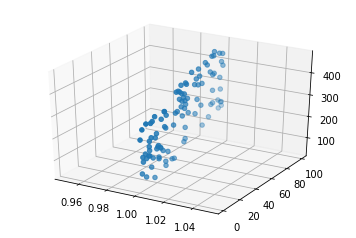

In [8]:
X = []
Y = []

for line in open('data_2d.csv'):
    x1, x2, y = line.split(',')
    X.append([1, float(x1), float(x2)])
    Y.append(float(y))

X = np.array(X)
Y = np.array(Y)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:, 0], X[:, 1], Y)
plt.show()

In [9]:
w = np.linalg.solve(np.dot(X.T, X), np.dot(X.T, Y))
Yhat = np.dot(X, w)

d1 = Y - Yhat
d2 = Y - Y.mean()
r2 = 1 - d1.dot(d1)/d2.dot(d2)

print('r-squared: ', r2)

r-squared:  0.998004061248


# Lecture 18

In [10]:
import pandas as pd

*** No CODEPAGE record, no encoding_override: will use 'ascii'


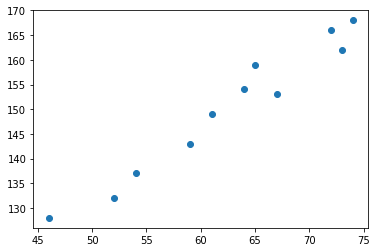

In [11]:
df = pd.read_excel('mlr02.xls')
X = df.as_matrix()
plt.scatter(X[:,1], X[:,0])
plt.show()

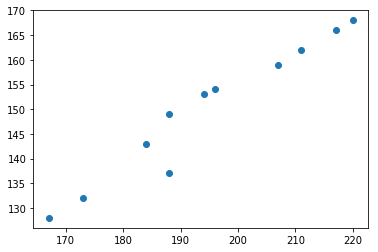

In [12]:
plt.scatter(X[:,2], X[:,0])
plt.show()

In [13]:
df['one'] = 1
Y = df['X1']
X = df[['X2', 'X3', 'one']]

X2only = df[['X2', 'one']]
X3only = df[['X3', 'one']]

In [14]:
def get_r2(X, Y):
    w = np.linalg.solve(np.dot(X.T, X), np.dot(X.T, Y))
    Yhat = np.dot(X, w)
    d1 = Y - Yhat
    d2 = Y - Y.mean()
    r2 = 1 - d1.dot(d1)/d2.dot(d2)
    return r2

In [15]:
print("r2 for x2 only: ", get_r2(X2only, Y))
print("r2 for x3 only: ", get_r2(X3only, Y))
print("r2 for both ", get_r2(X, Y))

r2 for x2 only:  0.957840720815
r2 for x3 only:  0.941995208529
r2 for both  0.97684710415
